In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#Loading Dataset
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

<AxesSubplot: ylabel='count'>

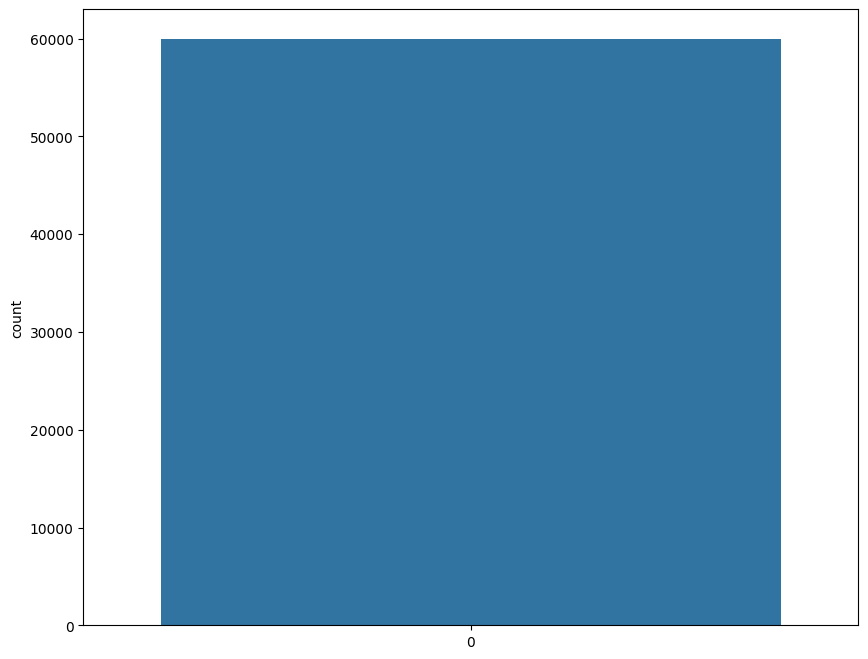

In [3]:
plt.figure(figsize = (10,8))
sns.countplot(y_train)

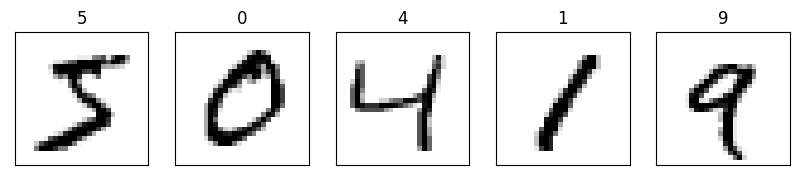

In [4]:
# Display some images
fig, axes = plt.subplots(ncols=5, sharex=False, 
    sharey=True, figsize=(10, 4))
for i in range(5):
    axes[i].set_title(y_train[i])
    axes[i].imshow(x_train[i], cmap='gray_r')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

In [5]:
print('Training images shape : ',x_train.shape)
print('Testing images shape : ',x_test.shape)

Training images shape :  (60000, 28, 28)
Testing images shape :  (10000, 28, 28)


In [6]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [7]:
#applying normalization
x_train=x_train/255.0
x_testg=x_test/255.0
num_classes = 10

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten,Activation
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

In [9]:
model = Sequential()

model.add(Conv2D(128, kernel_size=(3, 3),
                 activation=tf.nn.relu,
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation=tf.nn.relu))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(32, (3, 3), activation=tf.nn.relu))
model.add(BatchNormalization())
model.add(Dropout(0.3))


model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation=tf.nn.softmax))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 128)       1280      
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 128)      512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 26, 26, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        73792     
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 64)       256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 24, 24, 64)        0

In [11]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='model.png')

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [12]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
history=model.fit(x=x_train,
                  y=y_train,
                  validation_split=0.1,
                  epochs=10)

Epoch 1/10
1688/1688 [==============================] - 459s 269ms/step - loss: 0.2610 - accuracy: 0.9229 - val_loss: 0.0702 - val_accuracy: 0.9808
Epoch 2/10
1688/1688 [==============================] - 537s 318ms/step - loss: 0.1083 - accuracy: 0.9687 - val_loss: 0.0849 - val_accuracy: 0.9823
Epoch 3/10
1688/1688 [==============================] - 908s 538ms/step - loss: 0.0861 - accuracy: 0.9744 - val_loss: 0.0766 - val_accuracy: 0.9867
Epoch 4/10
1688/1688 [==============================] - 616s 365ms/step - loss: 0.0752 - accuracy: 0.9780 - val_loss: 0.0796 - val_accuracy: 0.9852
Epoch 5/10
1688/1688 [==============================] - 604s 358ms/step - loss: 0.0635 - accuracy: 0.9813 - val_loss: 0.1198 - val_accuracy: 0.9825
Epoch 6/10
1688/1688 [==============================] - 532s 315ms/step - loss: 0.0574 - accuracy: 0.9832 - val_loss: 0.0975 - val_accuracy: 0.9860
Epoch 7/10
1688/1688 [==============================] - 418s 248ms/step - loss: 0.0538 - accuracy: 0.9842 - val_

In [13]:
model.save('project.h5')

In [14]:
from tensorflow.keras.models import load_model
model = load_model('project.h5')

In [15]:
#Evaluate the Model
loss_and_acc=model.evaluate(x_test,y_test)
print("Test Loss", loss_and_acc[0])
print("Test Accuracy", loss_and_acc[1])

313/313 [==============================] - 14s 43ms/step - loss: 3.2885 - accuracy: 0.9831
Test Loss 3.2884535789489746
Test Accuracy 0.9830999970436096


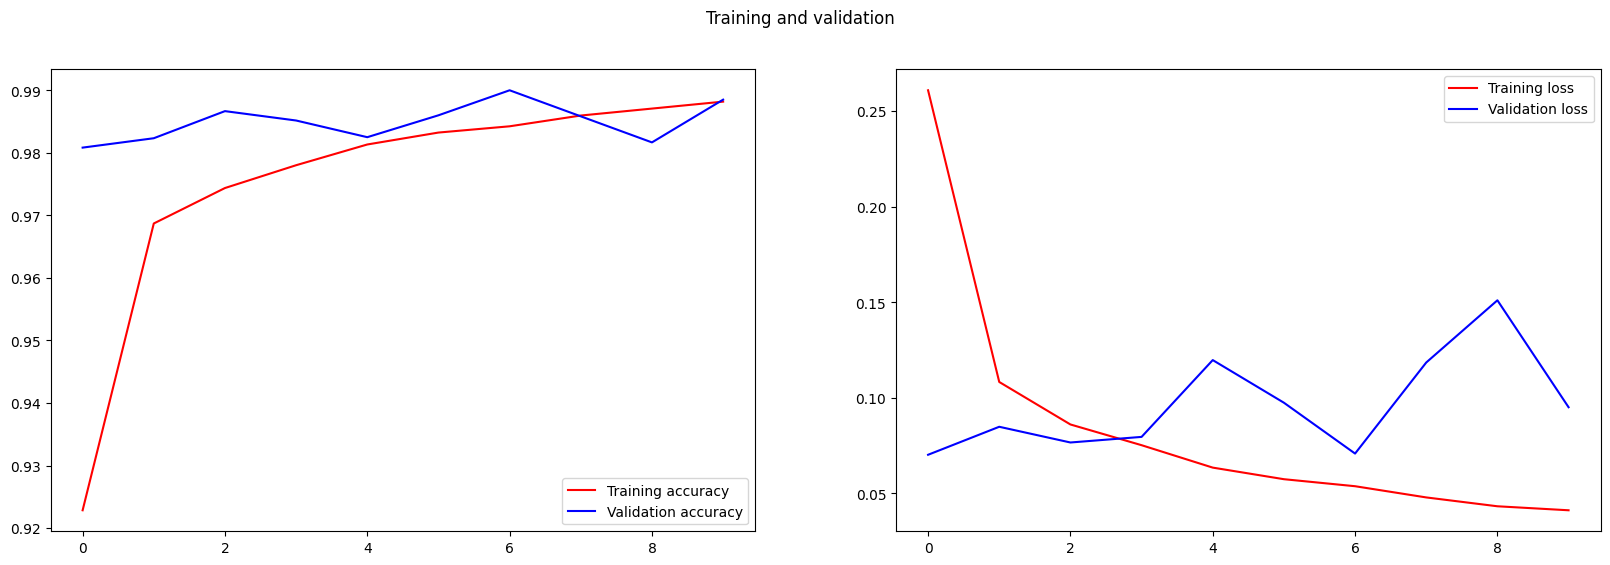

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
ax[0].plot(epochs, acc, 'r', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'b', label='Validation accuracy')
ax[0].legend(loc=0)
ax[1].plot(epochs, loss, 'r', label='Training loss')
ax[1].plot(epochs, val_loss, 'b', label='Validation loss')
ax[1].legend(loc=0)

plt.suptitle('Training and validation')
plt.show()

In [17]:
#Confusion Matrix
y_predicted = model.predict(x_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

313/313 [==============================] - 16s 39ms/step


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 968,    0,    4,    0,    2,    2,    2,    1,    1,    0],
       [   0, 1129,    0,    1,    0,    2,    0,    3,    0,    0],
       [   1,    1, 1017,    1,    0,    0,    0,   12,    0,    0],
       [   0,    0,    2, 1006,    0,    1,    0,    1,    0,    0],
       [   0,    1,    0,    0,  976,    0,    4,    0,    0,    1],
       [   1,    0,    1,   11,    0,  877,    2,    0,    0,    0],
       [   2,    3,    0,    0,    1,    3,  949,    0,    0,    0],
       [   0,    0,    4,    1,    0,    1,    0, 1022,    0,    0],
       [   7,    3,    8,    8,    6,   10,    7,    5,  908,   12],
       [   2,    1,    0,    1,   15,    5,    0,    6,    0,  979]])>

Text(95.72222222222221, 0.5, 'Truth')

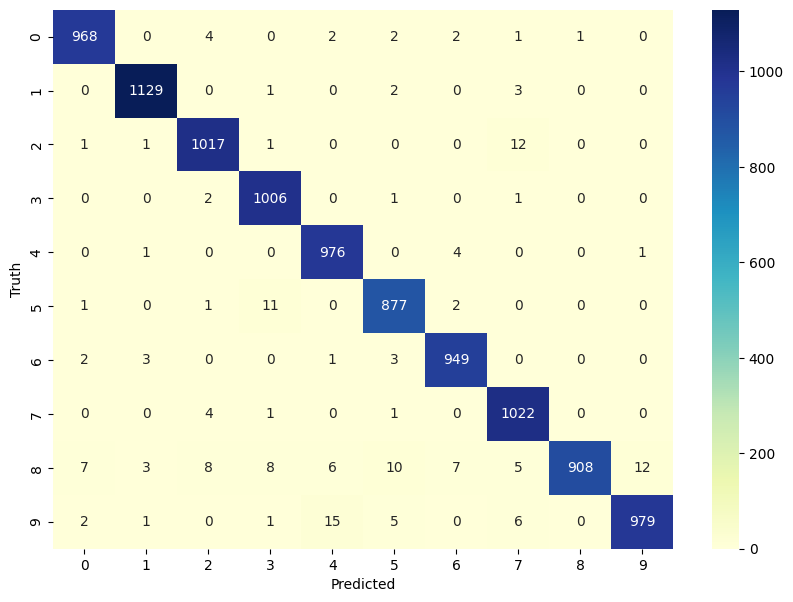

In [18]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap = 'YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('Truth')

313/313 [==============================] - 13s 41ms/step
Predicted Value:  7
Successful prediction


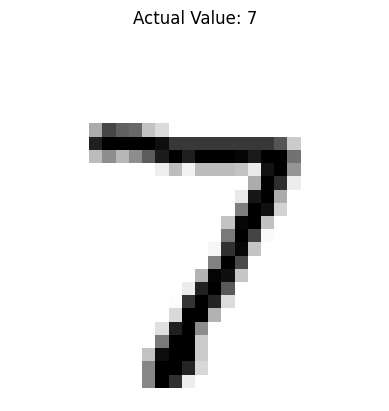

In [19]:
plt.imshow(x_test[0],cmap='gray_r')
plt.title('Actual Value: {}'.format(y_test[0]))
prediction=model.predict(x_test)

plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[0]))
if(y_test[0]==(np.argmax(prediction[0]))):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')

313/313 [==============================] - 12s 39ms/step
Predicted Value:  2
Successful prediction


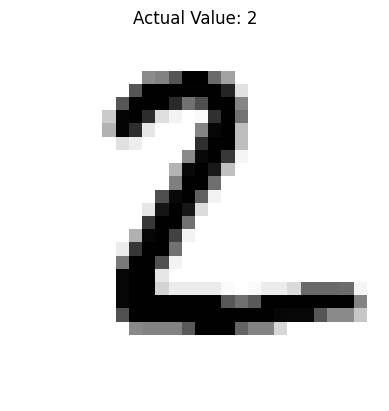

In [20]:
plt.imshow(x_test[1],cmap='gray_r')
plt.title('Actual Value: {}'.format(y_test[1]))
prediction=model.predict(x_test)
plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[1]))
if(y_test[1]==(np.argmax(prediction[1]))):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')